In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./project/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [2]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df2 = pd.get_dummies(df, drop_first=True)

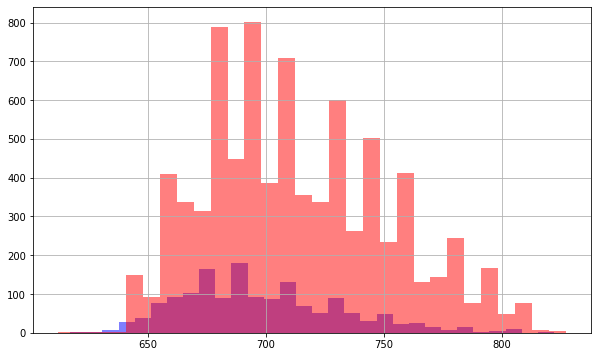

In [5]:
plt.figure(figsize=(10,6))
df2[df2['not.fully.paid']==1].fico.hist(alpha=0.5, color='blue', bins=30)
df2[df2['not.fully.paid']==0].fico.hist(alpha = 0.5, color='red', bins=30)

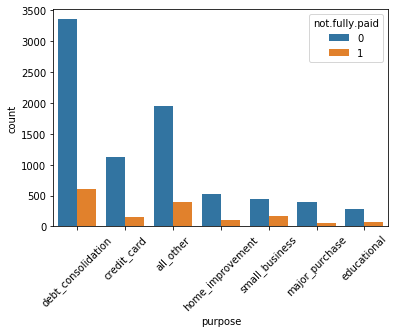

In [6]:
chart = sns.countplot(x = 'purpose', data=df, hue='not.fully.paid')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

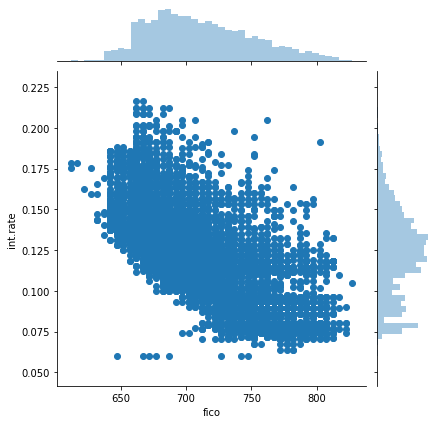

In [7]:
sns.jointplot(x='fico', y='int.rate', data=df)

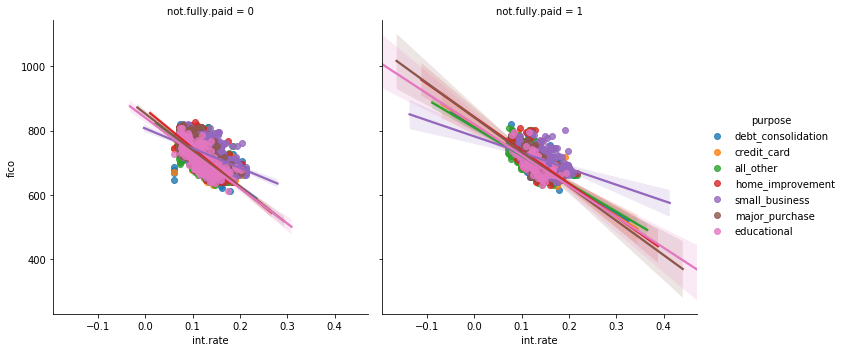

In [8]:
sns.lmplot(x = 'int.rate', y='fico', data = df, col='not.fully.paid', hue='purpose')

In [9]:
x = df2.drop('not.fully.paid', axis = 1)
y = df['not.fully.paid']
x

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,1,0,0


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.05, random_state = 77)

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
predictions = tree.predict(x_test)
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       414
           1       0.17      0.22      0.19        65

    accuracy                           0.76       479
   macro avg       0.52      0.53      0.52       479
weighted avg       0.78      0.76      0.77       479



In [21]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000).fit(x_train, y_train)
report = classification_report(y_test, forest.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       414
           1       0.29      0.03      0.06        65

    accuracy                           0.86       479
   macro avg       0.58      0.51      0.49       479
weighted avg       0.79      0.86      0.81       479



In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression().fit(x_train, y_train)
p = log.predict(x_test)
rp = classification_report(y_test, p)
print(rp)

In [ ]:
from sklearn.svm import SVC
svc = SVC().fit(x_train, y_train)
print( classification_report( y_test, svc.predict(x_test) ) )

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'C':[0.1,1,10,0], 'gamma':[1.0,0.1,0.01]}
grid = GridSearchCV(SVC(), param_grid=params, refit=True, verbose=True)
grid.fit(x_train, y_train)
grig.best_params_